In [159]:
import matplotlib.pyplot as plt
from arch import arch_model
import pandas_ta as ta
import pandas as pd
import numpy as np
import os
import yfinance as yf

start='2024-07-05'
end='2024-08-25'
daily_df=yf.download('^NSEI',start,end)

daily_df = daily_df.reset_index()

daily_df['Date'] = pd.to_datetime(daily_df['Date'])

daily_df = daily_df.set_index('Date')
daily_df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-07-05,24213.349609,24363.000000,24168.849609,24323.849609,24323.849609,298400
2024-07-08,24329.449219,24344.599609,24240.550781,24320.550781,24320.550781,266300
2024-07-09,24351.000000,24443.599609,24331.900391,24433.199219,24433.199219,250500
2024-07-10,24459.849609,24461.050781,24141.800781,24324.449219,24324.449219,292300
2024-07-11,24396.550781,24402.650391,24193.750000,24315.949219,24315.949219,306400


In [160]:
start='2024-07-5'
end='2024-8-25'
intraday_5min_df = yf.download('^NSEI', start=start, end=end, interval='5m')
intraday_5min_df['date'] = pd.to_datetime(intraday_5min_df.index.date)

intraday_5min_df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,date
Datetime,,,,,,,
2024-07-05 09:15:00+05:30,24208.349609,24258.849609,24194.099609,24200.099609,24200.099609,0,2024-07-05
2024-07-05 09:20:00+05:30,24202.449219,24207.949219,24184.500000,24204.650391,24204.650391,0,2024-07-05
2024-07-05 09:25:00+05:30,24204.349609,24208.050781,24184.699219,24186.050781,24186.050781,0,2024-07-05
2024-07-05 09:30:00+05:30,24186.150391,24205.949219,24170.349609,24191.000000,24191.000000,0,2024-07-05
2024-07-05 09:35:00+05:30,24190.250000,24207.550781,24180.800781,24200.500000,24200.500000,0,2024-07-05


In [161]:
daily_df['log_ret'] = np.log(daily_df['Adj Close']).diff()

daily_df['variance'] = daily_df['log_ret'].rolling(1).var()

def predict_volatility(x):
    
    best_model = arch_model(y=x,
                            p=1,
                            q=3).fit(update_freq=5,
                                     disp='off')
    
    variance_forecast = best_model.forecast(horizon=1).variance.iloc[-1,0]

    print(x.index[-1])
    
    return variance_forecast

daily_df['predictions'] = daily_df['log_ret'].rolling(1).apply(lambda x: predict_volatility(x))

daily_df = daily_df.dropna()

daily_df

2024-07-09 00:00:00
2024-07-10 00:00:00
2024-07-11 00:00:00
2024-07-12 00:00:00
2024-07-15 00:00:00
2024-07-16 00:00:00
2024-07-18 00:00:00
2024-07-19 00:00:00
2024-07-22 00:00:00
2024-07-23 00:00:00
2024-07-24 00:00:00
2024-07-25 00:00:00
2024-07-26 00:00:00
2024-07-29 00:00:00
2024-07-30 00:00:00
2024-07-31 00:00:00
2024-08-01 00:00:00
2024-08-02 00:00:00
2024-08-05 00:00:00
2024-08-06 00:00:00
2024-08-07 00:00:00
2024-08-08 00:00:00
2024-08-09 00:00:00
2024-08-12 00:00:00
2024-08-13 00:00:00
2024-08-14 00:00:00
2024-08-16 00:00:00
2024-08-19 00:00:00
2024-08-20 00:00:00
2024-08-21 00:00:00
2024-08-22 00:00:00
2024-08-23 00:00:00


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 5.657e-06. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 1000 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 2.062e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/

,Open,High,Low,Close,Adj Close,Volume,log_ret,variance,predictions
Date,,,,,,,,,
2024-07-09,24351.000000,24443.599609,24331.900391,24433.199219,24433.199219,250500,0.004621,1.131337e-05,5.656679e-06
2024-07-10,24459.849609,24461.050781,24141.800781,24324.449219,24324.449219,292300,-0.004461,4.124112e-05,2.062052e-05
2024-07-11,24396.550781,24402.650391,24193.750000,24315.949219,24315.949219,306400,-0.000350,8.451568e-06,4.225781e-06
2024-07-12,24387.949219,24592.199219,24331.150391,24502.150391,24502.150391,325800,0.007628,3.182350e-05,1.591172e-05
2024-07-15,24587.599609,24635.050781,24522.750000,24586.699219,24586.699219,305400,0.003445,8.751562e-06,4.375777e-06
2024-07-16,24615.900391,24661.250000,24587.650391,24613.000000,24613.000000,283200,0.001069,2.821704e-06,1.410852e-06
2024-07-18,24543.800781,24837.750000,24504.449219,24800.849609,24800.849609,350900,0.007603,2.134663e-05,1.067330e-05
2024-07-19,24853.800781,24854.800781,24508.150391,24530.900391,24530.900391,343800,-0.010944,1.720049e-04,8.600237e-05
2024-07-22,24445.750000,24595.199219,24362.300781,24509.250000,24509.250000,324200,-0.000883,5.061570e-05,2.530781e-05


In [162]:
daily_df['prediction_premium'] = (daily_df['predictions']-daily_df['variance'])/daily_df['variance']

daily_df['premium_std'] = daily_df['prediction_premium'].rolling(1).std()

daily_df['signal_daily'] = daily_df.apply(lambda x: 1 if (x['prediction_premium']>x['premium_std'])
                                         else (-1 if (x['prediction_premium']<x['premium_std']*-1) else np.nan),
                                         axis=1)

daily_df['signal_daily'] = daily_df['signal_daily'].shift()

daily_df.head()

,Open,High,Low,Close,Adj Close,Volume,log_ret,variance,predictions,prediction_premium,premium_std,signal_daily
Date,,,,,,,,,,,,
2024-07-09,24351.000000,24443.599609,24331.900391,24433.199219,24433.199219,250500,0.004621,1.131337e-05,5.656679e-06,-0.500001,NaN,NaN
2024-07-10,24459.849609,24461.050781,24141.800781,24324.449219,24324.449219,292300,-0.004461,4.124112e-05,2.062052e-05,-0.500001,3.709517e-07,NaN
2024-07-11,24396.550781,24402.650391,24193.750000,24315.949219,24315.949219,306400,-0.000350,8.451568e-06,4.225781e-06,-0.500000,5.071071e-07,-1.0
2024-07-12,24387.949219,24592.199219,24331.150391,24502.150391,24502.150391,325800,0.007628,3.182350e-05,1.591172e-05,-0.500001,4.683405e-07,-1.0
2024-07-15,24587.599609,24635.050781,24522.750000,24586.699219,24586.699219,305400,0.003445,8.751562e-06,4.375777e-06,-0.500000,4.274019e-07,-1.0
2024-07-16,24615.900391,24661.250000,24587.650391,24613.000000,24613.000000,283200,0.001069,2.821704e-06,1.410852e-06,-0.500000,2.840730e-07,-1.0
2024-07-18,24543.800781,24837.750000,24504.449219,24800.849609,24800.849609,350900,0.007603,2.134663e-05,1.067330e-05,-0.500001,6.622214e-07,-1.0
2024-07-19,24853.800781,24854.800781,24508.150391,24530.900391,24530.900391,343800,-0.010944,1.720049e-04,8.600237e-05,-0.500000,3.822800e-07,-1.0
2024-07-22,24445.750000,24595.199219,24362.300781,24509.250000,24509.250000,324200,-0.000883,5.061570e-05,2.530781e-05,-0.500001,3.496939e-07,-1.0


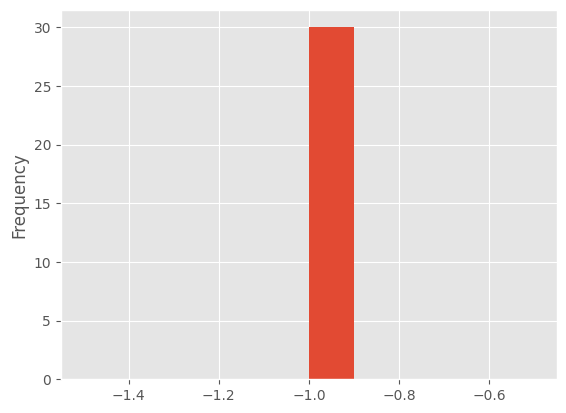

In [163]:
plt.style.use('ggplot')

daily_df['signal_daily'].plot(kind='hist')

plt.show()

In [164]:
final_df = intraday_5min_df.reset_index()\
                            .merge(daily_df[['signal_daily']].reset_index(),
                                   left_on='date',
                                   right_on='Date')\
                            .drop(['date','Date'], axis=1)\
                            .set_index('Datetime')

final_df['rsi'] = pandas_ta.rsi(close=final_df['Close'],
                                length=20)

final_df['lband'] = pandas_ta.bbands(close=final_df['Close'],
                                     length=20).iloc[:,0]

final_df['uband'] = pandas_ta.bbands(close=final_df['Close'],
                                     length=20).iloc[:,2]

final_df['signal_intraday'] = final_df.apply(lambda x: 1 if (x['rsi']>70)&
                                                            (x['Close']>x['uband'])
                                             else (-1 if (x['rsi']<30)&
                                                         (x['Close']<x['lband']) else np.nan),
                                             axis=1)

final_df['return'] = np.log(final_df['Close']).diff()

final_df


,Open,High,Low,Close,Adj Close,Volume,signal_daily,rsi,lband,uband,signal_intraday,return
Datetime,,,,,,,,,,,,
2024-07-09 09:15:00+05:30,24349.750000,24371.000000,24335.250000,24368.150391,24368.150391,0,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-09 09:20:00+05:30,24367.949219,24373.099609,24351.400391,24370.949219,24370.949219,0,NaN,NaN,NaN,NaN,NaN,0.000115
2024-07-09 09:25:00+05:30,24364.400391,24371.349609,24356.199219,24361.150391,24361.150391,0,NaN,NaN,NaN,NaN,NaN,-0.000402
2024-07-09 09:30:00+05:30,24360.550781,24369.099609,24351.500000,24365.650391,24365.650391,0,NaN,NaN,NaN,NaN,NaN,0.000185
2024-07-09 09:35:00+05:30,24365.150391,24378.050781,24360.150391,24378.050781,24378.050781,0,NaN,NaN,NaN,NaN,NaN,0.000509
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-23 15:05:00+05:30,24827.300781,24833.300781,24808.000000,24822.400391,24822.400391,0,-1.0,44.581930,24819.775118,24843.935039,NaN,-0.000228
2024-08-23 15:10:00+05:30,24821.050781,24829.300781,24816.099609,24822.699219,24822.699219,0,-1.0,44.777861,24819.619814,24844.010264,NaN,0.000012
2024-08-23 15:15:00+05:30,24822.000000,24828.550781,24815.050781,24825.000000,24825.000000,0,-1.0,46.316105,24820.061979,24843.808138,NaN,0.000093


In [165]:
final_df['return_sign'] = final_df.apply(lambda x: -1 if (x['signal_daily']==1)&(x['signal_intraday']==1)
                                        else (1 if (x['signal_daily']==-1)&(x['signal_intraday']==-1) else np.nan),
                                        axis=1)

final_df['return_sign'] = final_df.groupby(pd.Grouper(freq='D'))['return_sign']\
                                  .transform(lambda x: x.ffill())

final_df['forward_return'] = final_df['return'].shift(-1)

final_df['strategy_return'] = final_df['forward_return']*final_df['return_sign']

daily_return_df = final_df.groupby(pd.Grouper(freq='D'))['strategy_return'].sum()

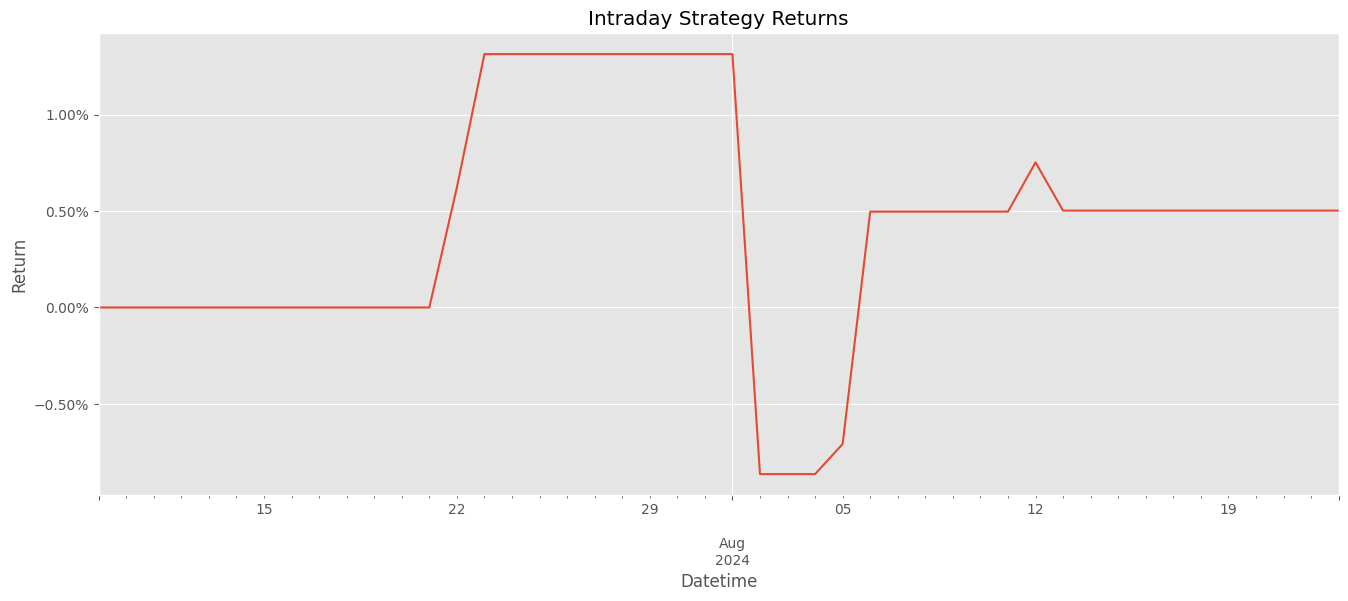

In [166]:
import matplotlib.ticker as mtick

strategy_cumulative_return = np.exp(np.log1p(daily_return_df).cumsum()).sub(1)

strategy_cumulative_return.plot(figsize=(16,6))

plt.title('Intraday Strategy Returns')

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))

plt.ylabel('Return')

plt.show()